<font size = '6'>Construct the formula behind an A/B test: student's t test</font>

<font size = '4.5'>Basically, I'm going to use a survey data to construct a simple student's t test</font>

credit: NYU GS-DA 1001

In [2]:
#import packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('/Users/dell/Desktop/Data/survey_responses_2019.csv', header = 0, sep=',')

In [16]:
print("the columns are:")
for element in data.columns.values:
    print(element)
text = 'the shape of the data frame is: {}'.format(data.shape)
print(text)

the columns are:
id
cs_python
cs_java
cs_c
cs_perl
cs_javascript
cs_r
cs_sas
profile_1
profile_2
profile_3
profile_4
profile_5
profile_6
profile_7
len_answer
experience_coded
experience
the shape of the data frame is: (163, 18)


In [17]:
#a little bit of data cleaning to make column names more meaningful
profile_mapping = {1:'Viz',
                   2:'CS',
                   3:'Math',
                   4:'Stats',
                   5:'ML',
                   6:'Bus',
                   7:'Com'}

In [18]:
#a little bit of data cleaning to make column names more meaningful
newcols = []

for colname in data.columns:
    
    if colname[0:7] == 'profile':
        
        newcols.append('profile_{}'.format(profile_mapping[int(colname[-1])]))
        
    else:
        
        newcols.append(colname)
    
#Now swap the old columns with the values in newcols    
data.columns = newcols   

<font size = '4.5'> We want to examine the relationship between work experience and length of reply</font>

That is, does lengths of reply vary amongst different groups?

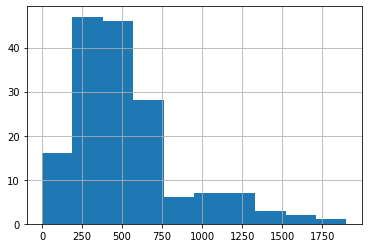

In [19]:
#preliminary exploratory data analysis

plt.figure()
data['len_answer'].hist()
plt.show()

In [ ]:
#From the chart above obviously we have some outliers, so we want to get rid of those

#Write a function to get the kth largest value of an array
def get_kth_largest(inarray, k):
    inarray.sort()
    return inarray[-k]

kth_largest = get_kth_largest(data.len_answer.values, 5)

outlier_filter = (data.len_answer > 50) & (data.len_answer < kth_largest)
data_clean = data[outlier_filter]


In [ ]:
#we do a summary based on groups
data_clean_grouped = data_clean[['len_answer', 'experience']].groupby(['experience']).agg(['mean', 'std', 'count'])
data_clean_grouped

In [ ]:
#Finally, create our t-test funciton
def pvalue_diffmeans_twotail(mu1, sig1, n1, mu2, sig2, n2):
    '''
    P-value calculator for the hypothesis test of mu1 != mu2.
    Takes in the approprate inputs to compute the t-statistic for the difference between means
    Outputs a p-value for a two-sample t-test.
    '''
    diff = mu1 - mu2
    stderror = np.sqrt(sig1**2 / n1 + sig2**2 / n2)
    t = diff / stderror
    
    p_value = 2 * (1- norm.cdf(np.abs(t)))
    
    return (t, p_value)

In [ ]:
# and examine if there is true difference between groups
ttest_data = data_clean_grouped


grps = ttest_data.index.values

#Now loop through each pair
for i, grp1 in enumerate(grps):
    for grp2 in grps[i + 1:]:
    
        '''
        hint: since the grp name is the index, pull out the record corresponding to that index value. 
        Also, the result of groupby uses a multi-index. So be sure to index on 'len_answer' as well.
        Then pull out the mean, std, and cnt from that result.   
        '''        
        row1 = ttest_data.loc[grp1].loc['len_answer']
        row2 = ttest_data.loc[grp2].loc['len_answer']
    
        tstat, p_value = pvalue_diffmeans_twotail(row1['mean'], row1['std'], row1['count'], row2['mean'], row2['std'], row2['count'])
    
        print('Two tailed T-Test between groups: {} and {}'.format(grp1, grp2))
        print('Diff = {} characters'.format(round(row1['mean'] - row2['mean'], 0)))
        print('The t-stat is {} and p-value is {}'.format(round(tstat, 3), round(p_value, 3)))
        print('')